@Author: Pooja
@Date: 18-11-2024
@Last modified by:Pooja
@Last modified Date:11-10-2024
@Title: Single layer neural network to predict whether customer will exit

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

Loading Dataset

In [3]:
data = pd.read_csv('https://drive.google.com/uc?id=1aYpqp7vGd1vy76fhP-2IQJywn0BLt3eM')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Analize dataset

In [4]:
# data.describe()
data.isnull().sum()
# data.info()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Handling categorical Data

In [6]:

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Gender: Male = 1, Female = 0
data['Geography'] = le.fit_transform(data['Geography'])



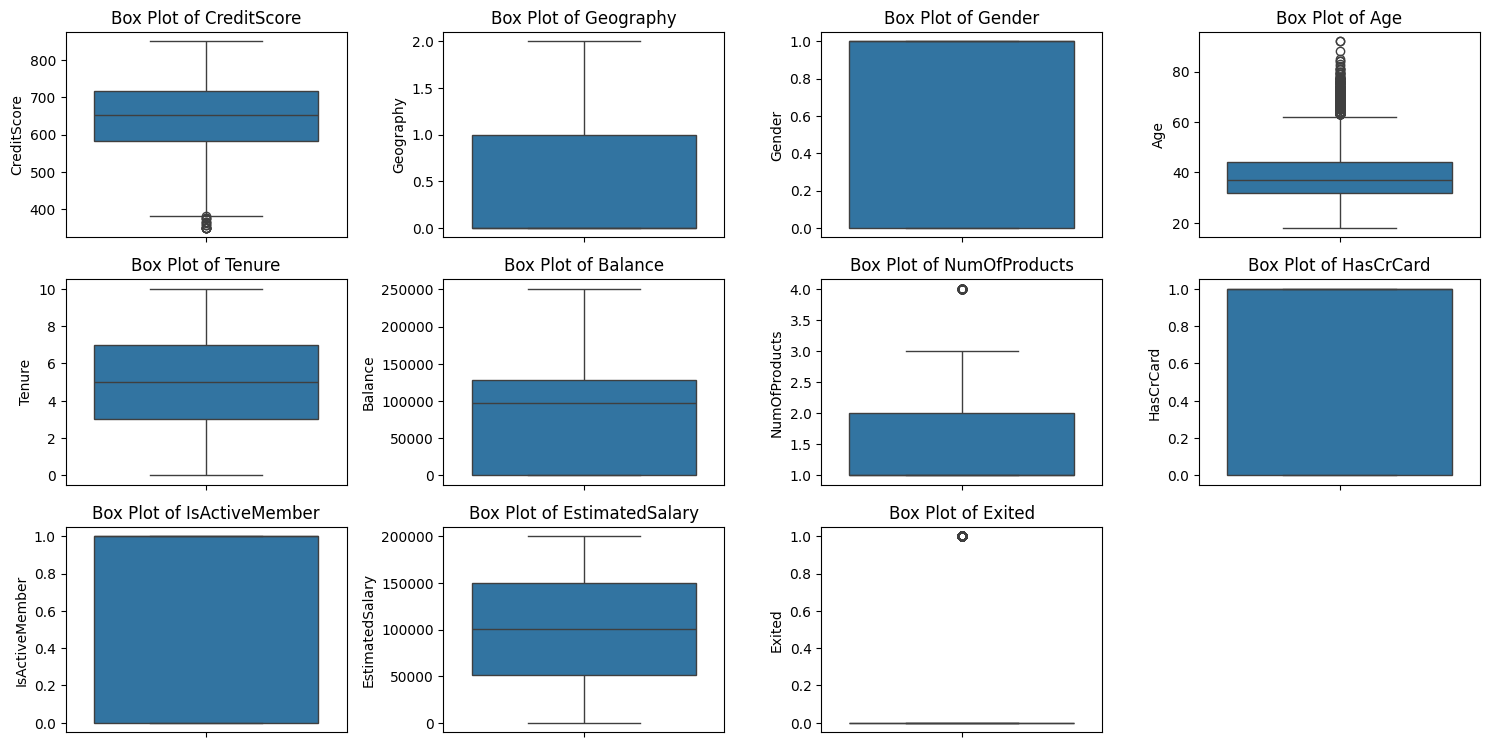

In [7]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()        # Select only numerical columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()

plt.show()

Original data shape: (10000, 11)
Filtered data shape: (7677, 11)


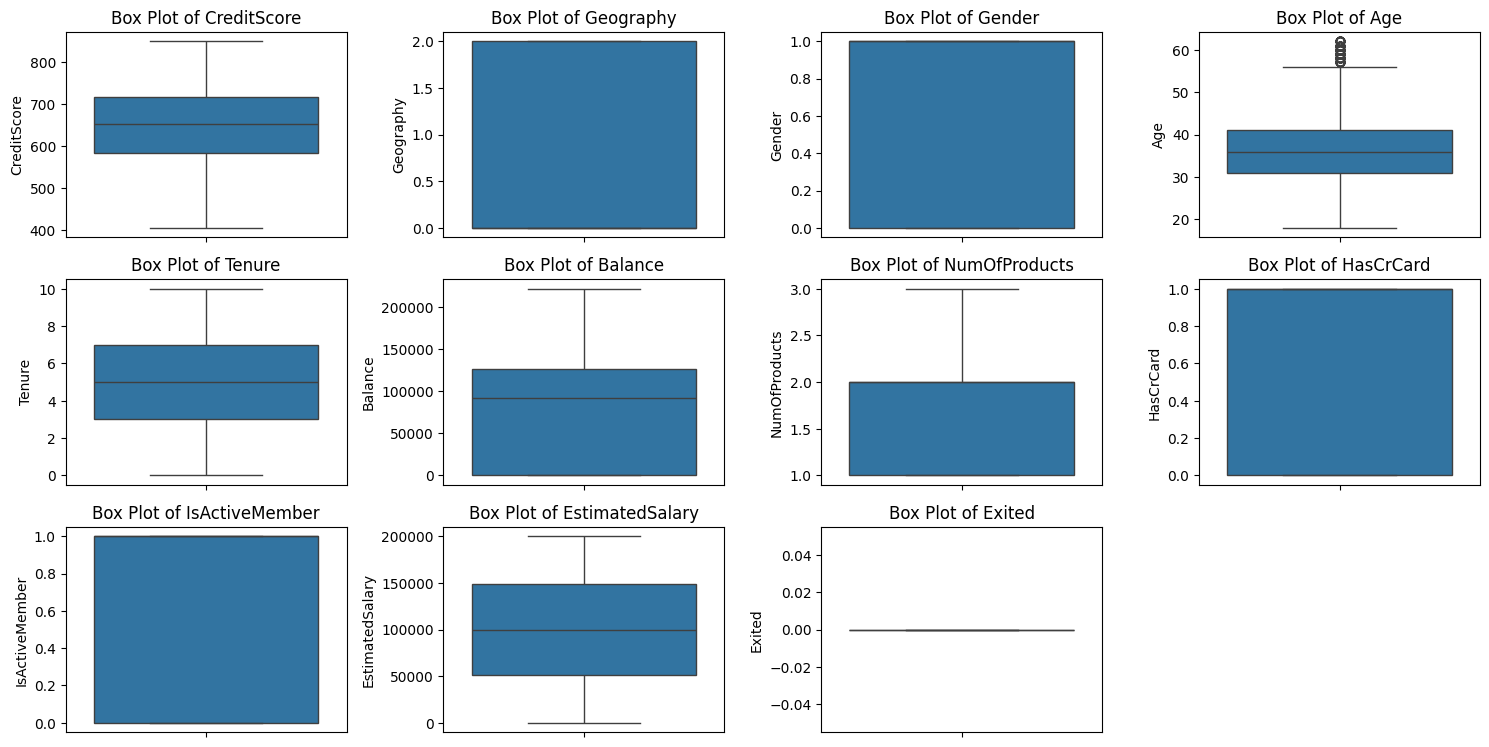

In [8]:
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the data to remove outliers
df_filtered = data[~((data[numeric_columns] < lower_bound) | (data[numeric_columns] > upper_bound)).any(axis=1)]

# Display the shape of the original and filtered data
print(f'Original data shape: {data.shape}')
print(f'Filtered data shape: {df_filtered.shape}')
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df_filtered[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


splitting dataset

In [9]:
X = data.drop('Exited', axis=1).values  
y = data['Exited'].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling Dataset

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Building model

In [15]:
model = Sequential()

model.add(Dense(units=1, activation='sigmoid', input_dim=X_train_scaled.shape[1]))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # otptimizer adjusts the learning rate during training

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50


c:\Users\pooja konduri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4177 - loss: 0.9426 - val_accuracy: 0.4794 - val_loss: 0.7994
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4862 - loss: 0.7898 - val_accuracy: 0.5875 - val_loss: 0.6821
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6027 - loss: 0.6720 - val_accuracy: 0.7031 - val_loss: 0.6019
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7271 - loss: 0.5943 - val_accuracy: 0.7819 - val_loss: 0.5490
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.7883 - loss: 0.5405 - val_accuracy: 0.7981 - val_loss: 0.5148
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.5112 - val_accuracy: 0.7981 - val_loss: 0.4921
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7923 - loss: 0.4950 - val_accuracy: 0.8031 - val_loss: 0.4768
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8156 - loss: 0.4656 - val_accuracy: 0.8037 - va

Predict on the test set

In [16]:
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.6).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model Performance

In [17]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1572   23]
 [ 366   39]]
Accuracy: 0.8055
